In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/EC-CO2 REG/SAC-Data.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(480, 26)

In [3]:
A=df['NCNF']
B=df["NCNT"]
C = df['NG']
D = df['NC']
E = df["Ag"]
F=df['Bi']
G=df["Co"]
H = df['Cu']
I = df['Fe']
J=df['La']
K=df["Mg"]
L = df['MnO2']
M=df['Ni']
N= df['Sn']
O= df['Sb']
P=df["Pd"]
Q=df["Zn"]
R=df["SAC"]
S=df["PT"]
T=df["KE"]
U=df["NE"]
V=df['VO']
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape


(480, 22)

In [4]:
from sklearn import preprocessing
AB = preprocessing.MinMaxScaler()
BC=AB.fit_transform(List1)
CD=pd.DataFrame(BC, columns=List1.columns[:])
CD.head(5)

,NCNF,NCNT,NG,NC,Ag,Bi,Co,Cu,Fe,La,...,Ni,Sn,Sb,Pd,Zn,SAC,PT,KE,NE,VO
0,0.0,0.0,0.0,0.9847,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020132,0.0,0.0,0.0,0.0,1.0,0.906977,0.5,0.0,0.687401
1,0.0,0.0,0.0,0.9847,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020132,0.0,0.0,0.0,0.0,1.0,0.906977,0.5,0.0,0.656141
2,0.0,0.0,0.0,0.9847,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020132,0.0,0.0,0.0,0.0,1.0,0.906977,0.5,0.0,0.624881
3,0.0,0.0,0.0,0.9847,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020132,0.0,0.0,0.0,0.0,1.0,0.906977,0.5,0.0,0.593621
4,0.0,0.0,0.0,0.9847,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020132,0.0,0.0,0.0,0.0,1.0,0.906977,0.5,0.0,0.562361


In [5]:
import seaborn as sns

In [6]:
X = List1
Y=  df['CO']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.2, random_state=42)

3.9639645828596484
10.0373135363819
0.9852734206713062
0.909822979154219
RandomForestRegressor(n_estimators=269, random_state=42)


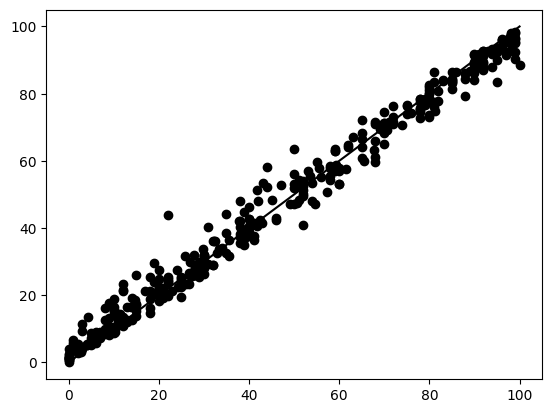

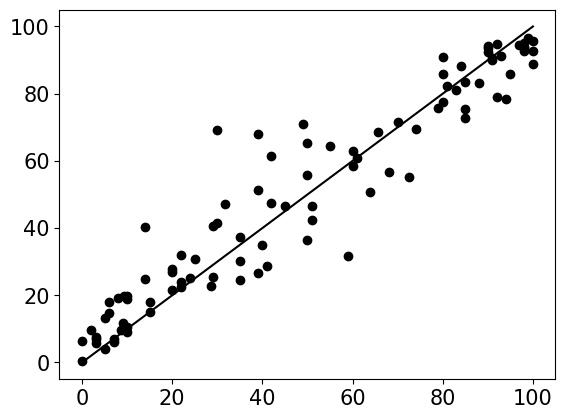

In [7]:
import math 
hyper_params_rdf = {'n_estimators':np.arange(1, 400, 1), 
                   } 
                    
np.random.seed(22)
RF=RandomForestRegressor(random_state=42, )
g_search_RF = RandomizedSearchCV(RF, hyper_params_rdf, cv=10, n_jobs=-1, )
rf_model=g_search_RF.fit(X_Train,Y_Train)
predict_rf_train=g_search_RF.predict(X_Train)
predict_rf_test=g_search_RF.predict(X_Test)
mse_rf_test = mean_squared_error(Y_Test, predict_rf_test)
mse_rf_train = mean_squared_error(Y_Train,predict_rf_train)
print(math.sqrt(mse_rf_train))
print(math.sqrt(mse_rf_test))
r2_rf_train = r2_score(Y_Train, predict_rf_train)
r2_rf_test = r2_score(Y_Test, predict_rf_test)
print( r2_rf_train)
print(r2_rf_test)
print(g_search_RF.best_estimator_)
plt.scatter(Y_Train, predict_rf_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()
plt.scatter(Y_Test, predict_rf_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

6.142103692080994
10.430349201867323
0.9646428998907579
0.902622504659198
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=344, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


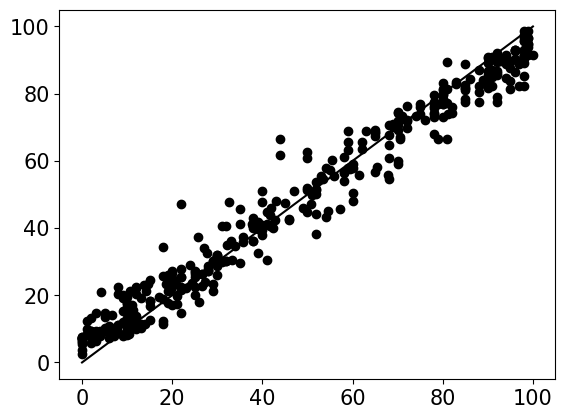

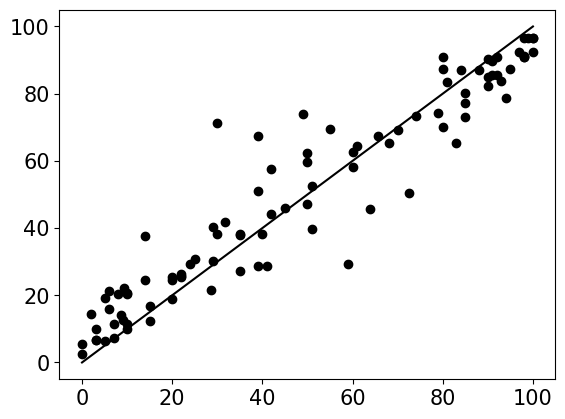

In [8]:
hyper_params_xgb = {'n_estimators':np.arange(1, 400, 1), 
                   }                  
np.random.seed(22)
xgb=xg.XGBRegressor(random_state=42, learning_rate=0.01, max_depth=7 )
g_search_xgb = RandomizedSearchCV(xgb, hyper_params_xgb, cv=10, n_jobs=-1)
g_search_xgb.fit(X_Train, Y_Train);
predict_xg_train = g_search_xgb.predict(X_Train)
predict_xg_test = g_search_xgb.predict(X_Test)
mse_xg_test = mean_squared_error(Y_Test,predict_xg_test)
mse_xg_train = mean_squared_error(Y_Train,predict_xg_train)
print(math.sqrt(mse_xg_train))
print(math.sqrt(mse_xg_test))
r2_xg_train = r2_score(Y_Train,predict_xg_train)
r2_xg_test = r2_score(Y_Test,predict_xg_test)
print(r2_xg_train)
print(r2_xg_test)
print(g_search_xgb.best_estimator_)
plt.scatter(Y_Train,predict_xg_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()
plt.scatter(Y_Test,predict_xg_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()

[22:50:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


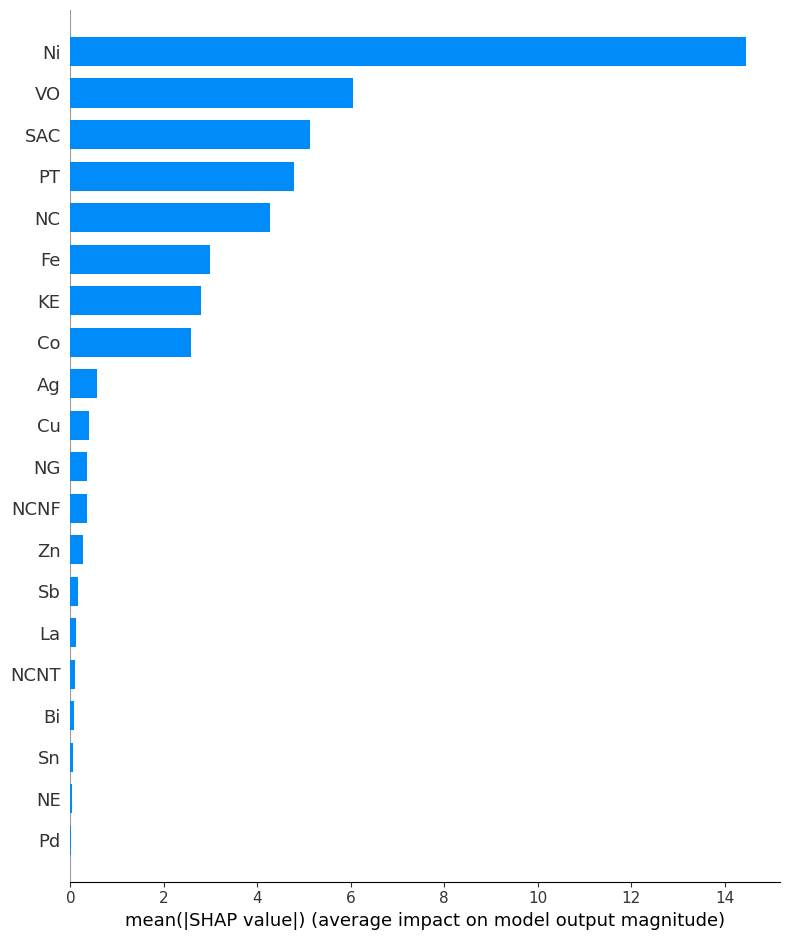

In [9]:
import shap
xgb=xg.XGBRegressor(random_state=42, learning_rate=0.01, max_depth=7, n_estimators=344 )
xgb.fit(X_Train, Y_Train)
explainer = shap.TreeExplainer(xgb, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')

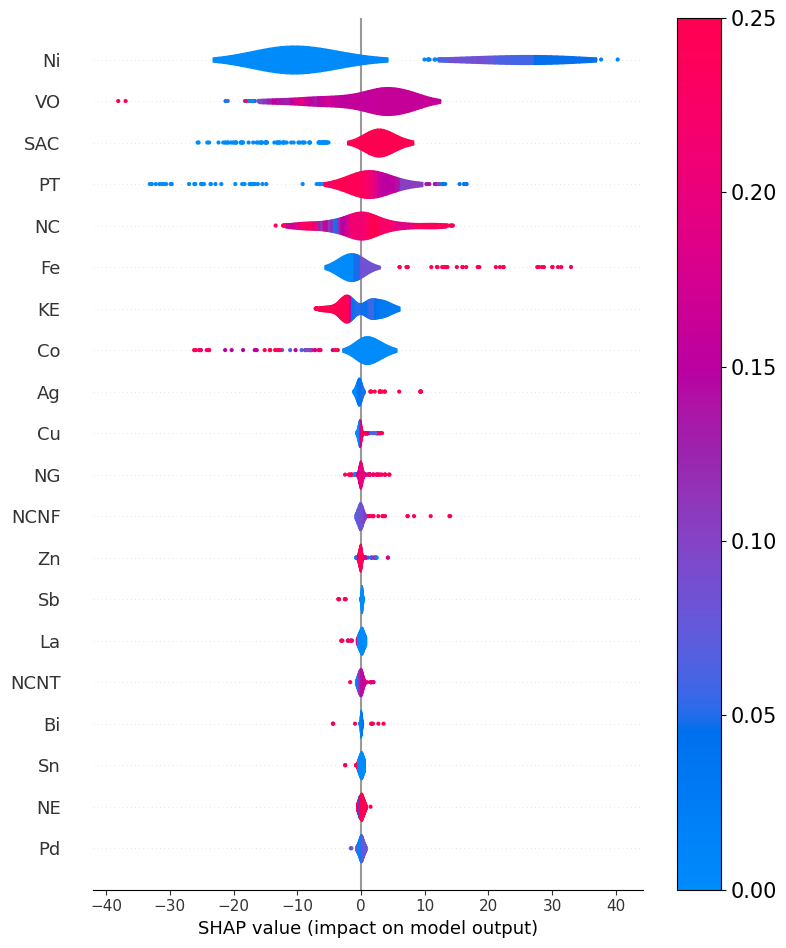

In [10]:
shap.summary_plot(shap_values_XGB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

5.329095007119923
11.369166257014408
0.9733836023677935
0.8843040550620336
GradientBoostingRegressor(n_estimators=344, random_state=42)


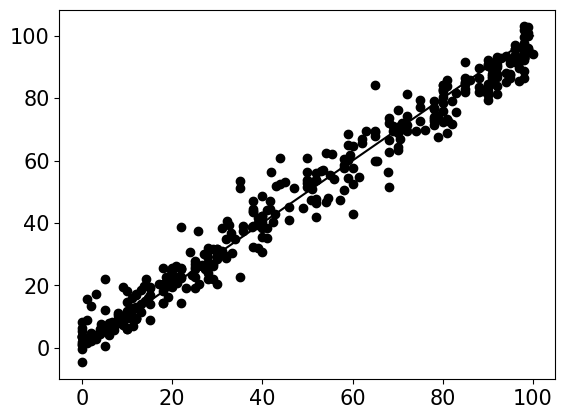

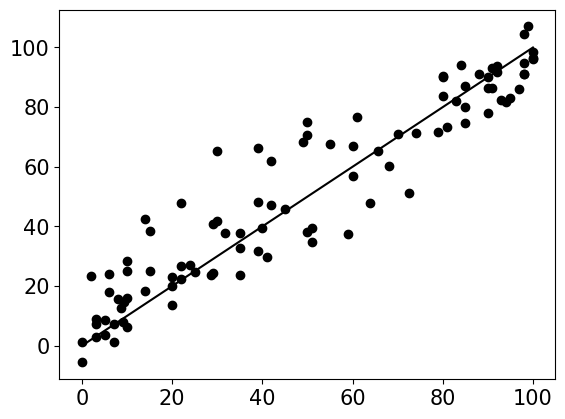

In [11]:
hyper_params_GBR = {"n_estimators":np.arange(1, 400, 1),}
np.random.seed(22)
GB= GradientBoostingRegressor(random_state=42, max_depth=3 )
g_search_GB = RandomizedSearchCV(GB, hyper_params_GBR, cv=10, n_jobs=-1)
g_search_GB.fit(X_Train, Y_Train);
predict_GB_train = g_search_GB.predict(X_Train)
predict_GB_test = g_search_GB.predict(X_Test)
mse_GB_test = mean_squared_error(Y_Test,predict_GB_test)
mse_GB_train = mean_squared_error(Y_Train,predict_GB_train)
print(math.sqrt(mse_GB_train))
print(math.sqrt(mse_GB_test))
r2_GB_train = r2_score(Y_Train,predict_GB_train)
r2_GB_test = r2_score(Y_Test,predict_GB_test)
print(r2_GB_train)
print(r2_GB_test)
print(g_search_GB.best_estimator_)
plt.scatter(Y_Train,predict_GB_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()
plt.scatter(Y_Test,predict_GB_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()

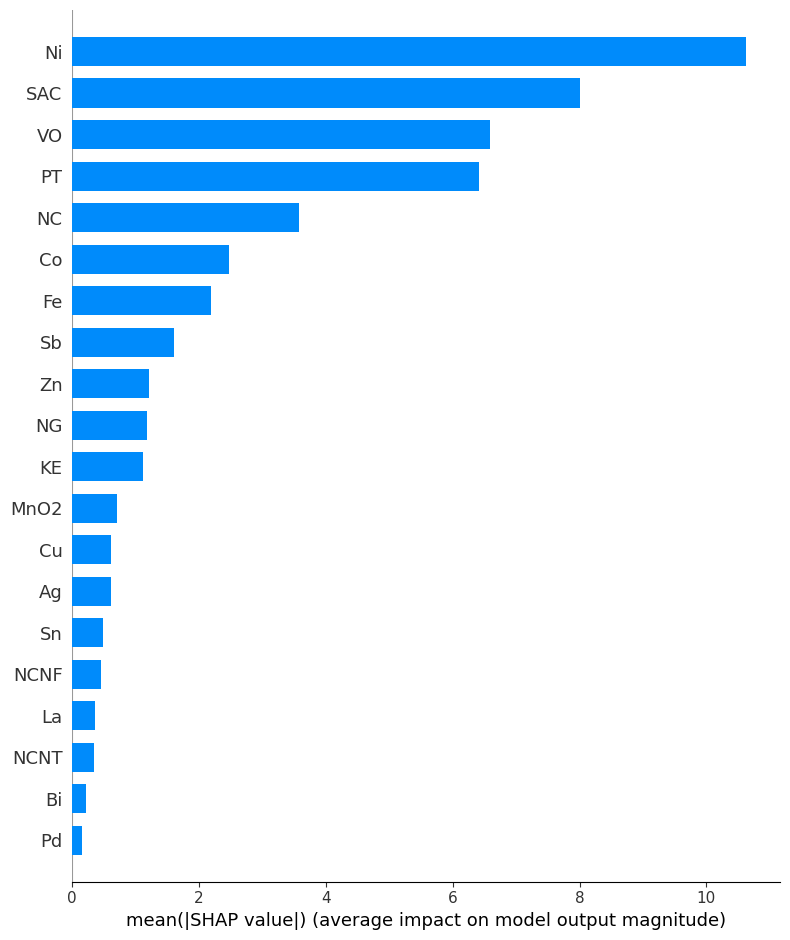

In [12]:
import shap
GB= GradientBoostingRegressor(random_state=42, n_estimators=344 )
GB.fit(X_Train, Y_Train)
explainer = shap.TreeExplainer(GB, X_Train)
shap_values_GB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_GB, X_Train, plot_type='bar')

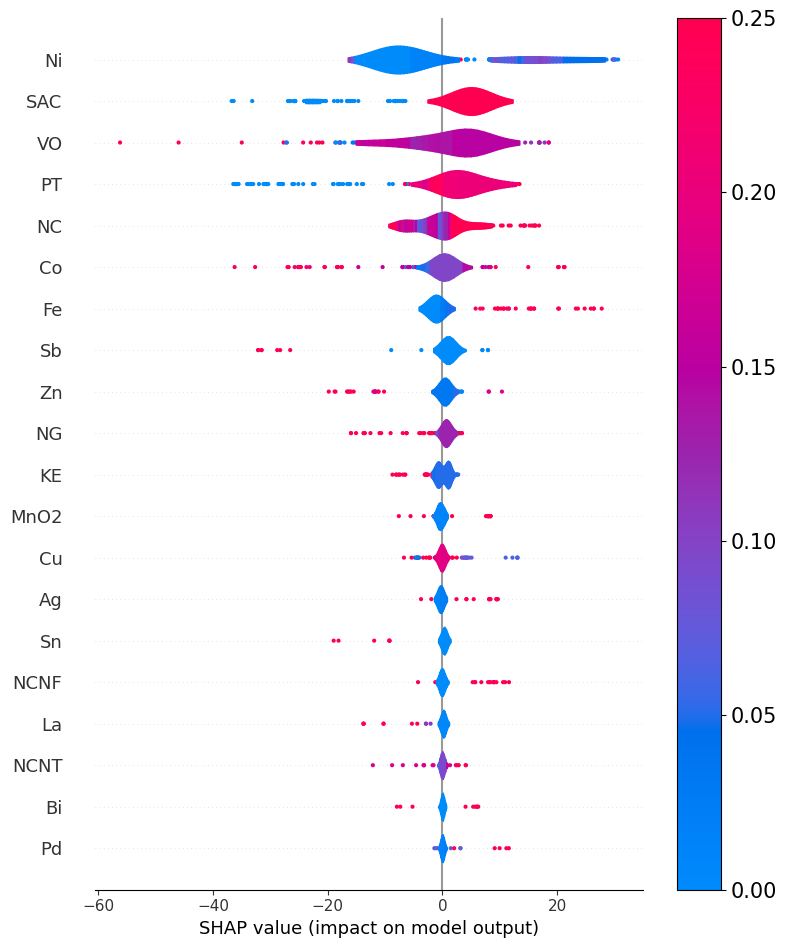

In [13]:
shap.summary_plot(shap_values_GB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

7.423099486648982
12.017859456943185
0.9483568276403911
0.870724822033776
ExtraTreesRegressor(min_samples_leaf=2, n_estimators=165, random_state=42)


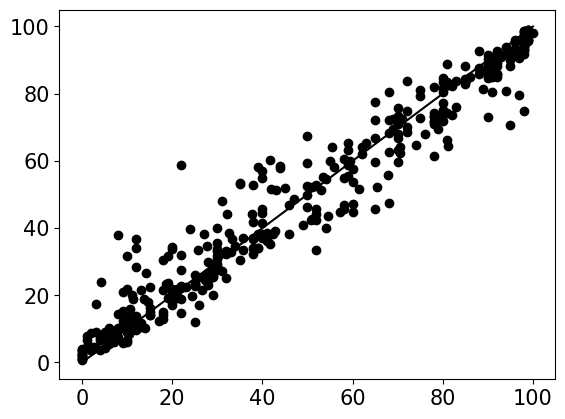

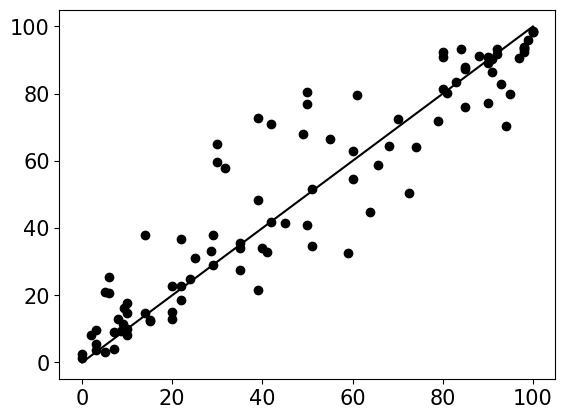

In [14]:
hyper_params_etg = {'n_estimators':np.arange(1, 400, 1),}
np.random.seed(22)
etg_tune = ExtraTreesRegressor(random_state=42, min_samples_leaf=2,)
g_search_etg = RandomizedSearchCV(etg_tune, hyper_params_etg, cv=10, n_jobs=-1)
g_search_etg.fit(X_Train, Y_Train);
predict_etg_train = g_search_etg.predict(X_Train)
predict_etg_test = g_search_etg.predict(X_Test)
mse_etg_test = mean_squared_error(Y_Test,predict_etg_test)
mse_etg_train = mean_squared_error(Y_Train,predict_etg_train)
print(math.sqrt(mse_etg_train))
print(math.sqrt(mse_etg_test))
r2_etg_train = r2_score(Y_Train,predict_etg_train)
r2_etg_test = r2_score(Y_Test,predict_etg_test)
print(r2_etg_train)
print(r2_etg_test)
print(g_search_etg.best_estimator_)
plt.scatter(Y_Train, predict_etg_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()
plt.scatter(Y_Test,predict_etg_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()

9.753092199895812
14.477571614504386
0.9108488376718432
0.8123915711572779
DecisionTreeRegressor(max_depth=11, min_samples_leaf=3, random_state=42)


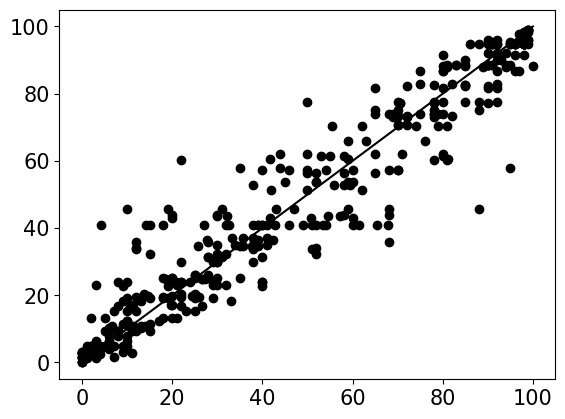

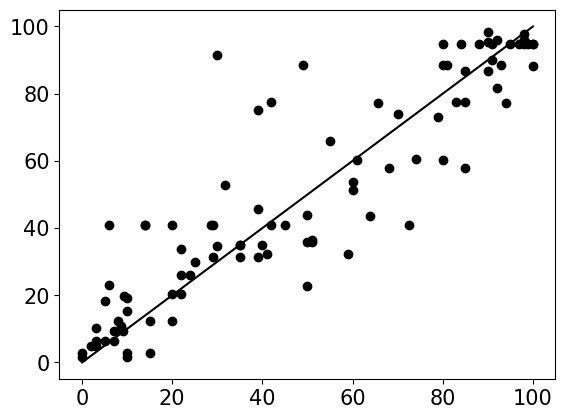

In [15]:
hyper_params_DT = {"max_depth":np.arange(1,20,1) }
np.random.seed(22)
DT= DecisionTreeRegressor(random_state=42, min_samples_leaf=3, min_samples_split=2 )
g_search_DT = RandomizedSearchCV(DT, hyper_params_DT, cv=10, n_jobs=-1)
g_search_DT.fit(X_Train, Y_Train);
predict_DT_train = g_search_DT.predict(X_Train)
predict_DT_test = g_search_DT.predict(X_Test)
mse_DT_test = mean_squared_error(Y_Test,predict_DT_test)
mse_DT_train = mean_squared_error(Y_Train,predict_DT_train)
print(math.sqrt(mse_DT_train))
print(math.sqrt(mse_DT_test))
r2_DT_train = r2_score(Y_Train,predict_DT_train)
r2_DT_test = r2_score(Y_Test,predict_DT_test)
print(r2_DT_train)
print(r2_DT_test)
print(g_search_DT.best_estimator_)
plt.scatter(Y_Train, predict_DT_train, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()
plt.scatter(Y_Test,predict_DT_test, marker='o', alpha=1, color="black")
plt.plot([-0, 100], [-0, 100], color="black")
plt.show()
